<h1>Programming Exercise 1: Linear Regression<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-regression-with-one-variable" data-toc-modified-id="Linear-regression-with-one-variable-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear regression with one variable</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-Data" data-toc-modified-id="Plotting-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plotting the Data</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gradient Descent</a></span></li><li><span><a href="#Visualizing-J($\theta$)" data-toc-modified-id="Visualizing-J($\theta$)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing J($\theta$)</a></span></li></ul></li></ul></div>

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Linear regression with one variable

In [13]:
dataFileName = '../Data/ex1data1.txt'
def loadData():
    file = open(dataFileName)
    data = []
    for line in file.readlines():
        lineArray = line.strip().split(',')
        temp = []
        ctot = len(lineArray)
        for i in range(ctot):
            temp.append(float(lineArray[i]))
        data.append(temp)
    return np.array(data)

# print(loadData())
dataSet = loadData()
X = dataSet[:, :-1]
y = dataSet[:, -1:]
m = dataSet.size // 2
print(m)
print(X[:5])

97
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]


## Plotting the Data

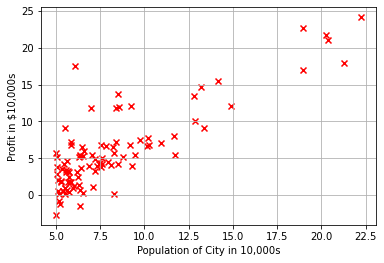

In [15]:
plt.scatter(X, y, color='r',marker='x')
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

plt.show()

## Gradient Descent

In [92]:
alpha = 0.01      # 学习率
iterations = 1500 # 迭代次数


X = np.hstack((np.ones((X.shape[0],1)), dataSet[:, :-1]))

print(np.zeros((X.shape[1],1))) # 

def h(X, theta):
    return np.dot(X,theta)

# print(X[-5:])
# list = [1,3,4,5,5,6,6,7,8,9,9,12,1,3,4]
# print(list[2:])
# print(X)
# print(h(X, np.zeros((2,1))))

def costJfunction(X, y, theta):
    return 0.5*np.sum(np.square(h(X,theta) - y)) / m
    
InitTheta = np.zeros((2,1))
print(costJfunction(X, y, InitTheta))


[[0.]
 [0.]]
32.072733877455676


In [187]:
# 梯度下降
def gradientDescent(X, y, theta):
    J_history = [] # 存放代价函数的值 画图用
    for time in range(iterations):
        theta = theta - alpha *  X.T.dot(h(X, theta)-y) / m
        J_history.append(costJfunction(X, y, theta))
    return theta, J_history


print(X.shape)
# 为什么 使用np.zeros 就变成了追加。。
theta, J_history = gradientDescent(X,y,np.array([[0],[0]]))
print(theta)

(97, 2)
[[-3.63029144]
 [ 1.16636235]]


In [190]:
predict1 = np.array([[1,3.5]]).dot(theta)
predict2 = np.array([[1,7]]).dot(theta)
print (predict1*10000,predict2*10000)

[[4519.7678677]] [[45342.45012945]]


Hypothesis: h(x) = -3.63 + 1.17x


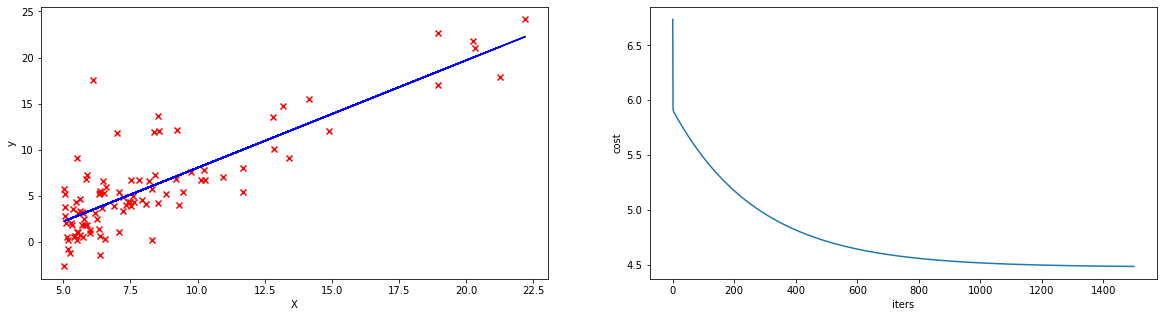

In [220]:
plt.figure(num=1,figsize=(20,5))
plt.subplot(121)
plt.scatter(X[:,1],y,color = 'r',marker= 'x')
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X[:,1],X.dot(theta),'-',color = 'blue')

print('Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))

plt.subplot(122)
#可视化一下cost变化曲线
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('cost')
plt.show()

## Visualizing J($\theta$)

(100, 100) 328.0929055495073 311.92025944831784


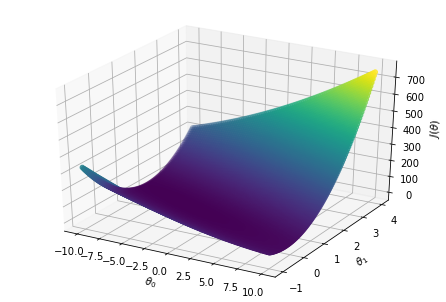

In [241]:
#可视化一下3d图像，因为J与theta0和theta1两个参数有关
#Visualizing J(theta_0, theta_1)
from mpl_toolkits.mplot3d import Axes3D

size = 100
theta0Vals = np.linspace(-10,10, size)
theta1Vals = np.linspace(-1, 4, size)
JVals = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        col = np.array([[theta0Vals[i]], [theta1Vals[j]]]).reshape(-1,1)
        JVals[i,j] = costJfunction(X,y,col)

# print(theta0Vals)
theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
# print(theta0Vals)
JVals = JVals.T
print (JVals.shape,JVals[0,0],JVals[1,1]) #test correct

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(theta0Vals, theta1Vals, JVals, c=np.abs(JVals))
# ax.plot_surface(theta0Vals, thetaeta1Vals, JVals)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

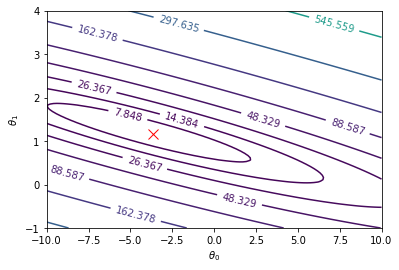

In [258]:
coutourFig = plt.figure()
ax = coutourFig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
plt.clabel(CS, inline=1, fontsize=10)
# 画出最值点
ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
plt.show()